In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew,kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report,roc_auc_score
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler,StandardScaler


#Extra setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',None)
warnings.filterwarnings("ignore")

In [2]:
#Loading train and test data
try:
    train_df=pd.read_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/train.csv')
    test_df=pd.read_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/test.csv')
    print("Train df shape: " ,train_df.shape)
    print("Test df shape: ", test_df.shape)

except FileNotFoundError:
    print('File not loaded')

Train df shape:  (891, 12)
Test df shape:  (418, 11)


In [3]:
#Null check function
def null_zero_check(df):
    null_values = df.isnull().sum()
    zero_values = null_values[null_values == 0]
    Total_record_count=df.shape[0]
    dataype = df.dtypes
    summary_df = pd.DataFrame({'Null count': null_values,
                               'Null_count_percent': null_values/Total_record_count*100,
                                'Zero count': zero_values,
                                'Zero_count_percent': zero_values/Total_record_count*100,
                                'Datatype': dataype})
    return summary_df

#Crosscheck Feature dTypes
def check_feature_dtypes(train_df, test_df):
    common_cols=train_df.columns.intersection(test_df.columns)
    mismatched_dtypes = []
    for col in common_cols:
        if train_df[col].dtype != test_df[col].dtype:
            mismatched_dtypes.append(
                (col, {"train": train_df[col].dtype, "test": test_df[col].dtype})
            )

    # Return True if no mismatches, False otherwise
    if not mismatched_dtypes:
        return True, mismatched_dtypes
    else:
        return False, mismatched_dtypes
    
#Function to Combine train and test data.Remove target from the train data before combining

def combine_df(df1,df2,tgt_col):
    trin_df_drop=df1.drop([tgt_col],axis=1)
    combined_df=pd.concat([trin_df_drop,df2],axis=0)
    return combined_df

#Function to check for duplicates 
def check_duplicates(df, columns=None):
    if columns is None:
        columns = df.columns

    duplicates = df[df.duplicated(subset=columns, keep=False)]
    return duplicates

#Final report generation
def perform_data_analysis(train_df, test_df,columns=None):
    print('Null check in train_df:')
    display(null_zero_check(train_df))
    print('Null check in test_df:')
    display(null_zero_check(test_df))
    print('Null check in combined_df:')
    combined_df=combine_df(train_df,test_df,'Survived')
    print('Combined_df shape: ',combined_df.shape)
    print('Is rows in train_df + test_df = combined_df?',train_df.shape[0]+test_df.shape[0]==combined_df.shape[0])
    display(null_zero_check(combined_df))

    print("Check describe for train_df")
    display(train_df.describe(include='all').T)
    print("Check describe for test_df")
    display(test_df.describe(include='all').T)
    print("Check describe for combined_df")
    display(combined_df.describe(include='all').T)

    print('Check for dataype mismatch between Train and Test.If True then no mismatch:',check_feature_dtypes(train_df, test_df))

    print('Check for duplicates in train_df')
    display(check_duplicates(train_df,columns))

    print('Check for duplicates in test_df')
    display(check_duplicates(test_df,columns))  

    print('Check for duplicates in combined_df')
    display(check_duplicates(combined_df,columns))

def model_training(train_df, test_df, train_survived):
    model = LogisticRegression()
    model.fit(train_df, train_survived)
    prediction = model.predict(test_df)
    return prediction

In [4]:
perform_data_analysis(train_df,test_df)

Null check in train_df:


,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,177,19.865320,NaN,NaN,float64
Cabin,687,77.104377,NaN,NaN,object
Embarked,2,0.224467,NaN,NaN,object
Fare,0,0.000000,0.0,0.0,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


Null check in test_df:


,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,86,20.574163,NaN,NaN,float64
Cabin,327,78.229665,NaN,NaN,object
Embarked,0,0.000000,0.0,0.0,object
Fare,1,0.239234,NaN,NaN,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


Null check in combined_df:
Combined_df shape:  (1309, 11)
Is rows in train_df + test_df = combined_df? True


,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,263,20.091673,NaN,NaN,float64
Cabin,1014,77.463713,NaN,NaN,object
Embarked,2,0.152788,NaN,NaN,object
Fare,1,0.076394,NaN,NaN,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


Check describe for train_df


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


Check describe for test_df


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check describe for combined_df


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for dataype mismatch between Train and Test.If True then no mismatch: (True, [])
Check for duplicates in train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Check for duplicates in test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Check for duplicates in combined_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [5]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Creating Bechmark model
train_df_benchmark=train_df.copy()
train_df_benchmark=train_df_benchmark[['Age', 'Fare', 'Parch', 'SibSp']]
display(train_df_benchmark.sample(2))

test_df_benchmark=test_df.copy()
test_df_benchmark=test_df_benchmark[['Age', 'Fare', 'Parch', 'SibSp']]
display(test_df_benchmark.sample(2))

train_df_benchmark=train_df_benchmark.fillna(0)
test_df_benchmark=test_df_benchmark.fillna(0)

train_survived=train_df['Survived']
display(train_survived.sample(2))


,Age,Fare,Parch,SibSp
167,45.0,27.9000,4,1
572,36.0,26.3875,0,0


,Age,Fare,Parch,SibSp
32,33.0,20.5750,2,1
252,27.0,136.7792,0,1


526    1
303    1
Name: Survived, dtype: int64

In [7]:
pred=model_training(train_df_benchmark, test_df_benchmark, train_survived)
pred_df=pd.DataFrame(pred)
pred_df.to_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/Predictions/benchmark.csv')
print(train_df_benchmark.shape,test_df_benchmark.shape,pred_df.shape)


(891, 4) (418, 4) (418, 1)


In [8]:
#Treating numeric variables
num_cols=['Age','Fare','Parch','SibSp']
print("Numeric columns in train:\n\n",null_zero_check(train_df[num_cols]))
print("\nNumeric columns in test:\n\n",null_zero_check(test_df[num_cols]))

#Age is having null count

Numeric columns in train:

        Null count  Null_count_percent  Zero count  Zero_count_percent Datatype
Age           177            19.86532         NaN                 NaN  float64
Fare            0             0.00000         0.0                 0.0  float64
Parch           0             0.00000         0.0                 0.0    int64
SibSp           0             0.00000         0.0                 0.0    int64

Numeric columns in test:

        Null count  Null_count_percent  Zero count  Zero_count_percent Datatype
Age            86           20.574163         NaN                 NaN  float64
Fare            1            0.239234         NaN                 NaN  float64
Parch           0            0.000000         0.0                 0.0    int64
SibSp           0            0.000000         0.0                 0.0    int64


In [9]:
train_df_null_age=train_df[train_df['Age'].isnull()]
train_df_null_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 5 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  177 non-null    int64  
 1   Survived     177 non-null    int64  
 2   Pclass       177 non-null    int64  
 3   Name         177 non-null    object 
 4   Sex          177 non-null    object 
 5   Age          0 non-null      float64
 6   SibSp        177 non-null    int64  
 7   Parch        177 non-null    int64  
 8   Ticket       177 non-null    object 
 9   Fare         177 non-null    float64
 10  Cabin        19 non-null     object 
 11  Embarked     177 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.0+ KB


In [10]:
train_df_null_age.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,177.000000,177.000000,177.000000,177,177,0.0,177.000000,177.000000,177,177.000000,19,177
unique,NaN,NaN,NaN,177,2,NaN,NaN,NaN,155,NaN,19,3
top,NaN,NaN,NaN,"Moran, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,B78,S
freq,NaN,NaN,NaN,1,124,NaN,NaN,NaN,7,NaN,1,90
mean,435.581921,0.293785,2.598870,NaN,NaN,NaN,0.564972,0.180791,NaN,22.158567,NaN,NaN
std,250.552901,0.456787,0.763216,NaN,NaN,NaN,1.626316,0.534145,NaN,31.874608,NaN,NaN
min,6.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,230.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.750000,NaN,NaN
50%,452.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,8.050000,NaN,NaN
75%,634.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.150000,NaN,NaN


In [11]:
train_df_not_null_age=train_df[train_df['Age'].notnull()]
train_df_not_null_age.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,714.000000,714.000000,714.000000,714,714,714.000000,714.000000,714.000000,714,714.000000,185,712
unique,NaN,NaN,NaN,714,2,NaN,NaN,NaN,542,NaN,134,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,4,554
mean,448.582633,0.406162,2.236695,NaN,NaN,29.699118,0.512605,0.431373,NaN,34.694514,NaN,NaN
std,259.119524,0.491460,0.838250,NaN,NaN,14.526497,0.929783,0.853289,NaN,52.918930,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,222.250000,0.000000,1.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,8.050000,NaN,NaN
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.741700,NaN,NaN
75%,677.750000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.375000,NaN,NaN


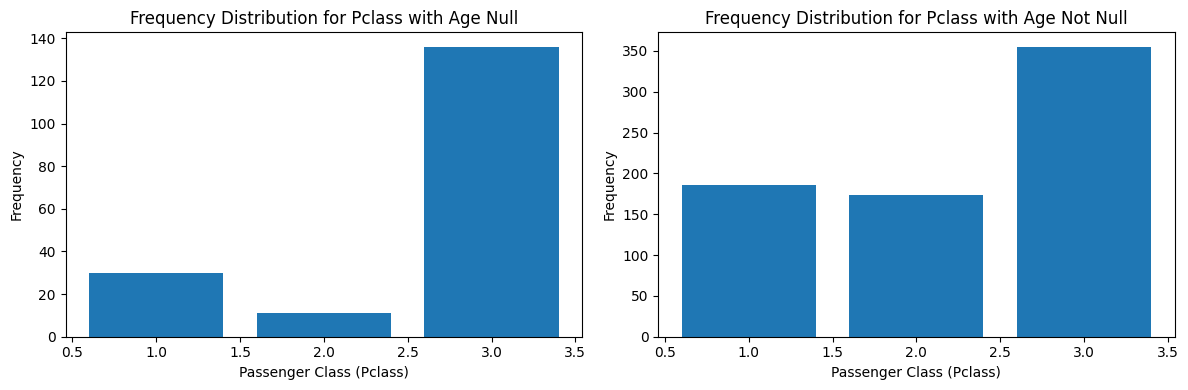

In [12]:
pclass_counts_null_age = train_df_null_age['Pclass'].value_counts()
pclass_counts_not_null_age = train_df_not_null_age['Pclass'].value_counts()

fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].bar(pclass_counts_null_age.index, pclass_counts_null_age.values)
axes[0].set_xlabel('Passenger Class (Pclass)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency Distribution for Pclass with Age Null')

axes[1].bar(pclass_counts_not_null_age.index, pclass_counts_not_null_age.values)
axes[1].set_xlabel('Passenger Class (Pclass)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency Distribution for Pclass with Age Not Null')

plt.tight_layout()
plt.show()

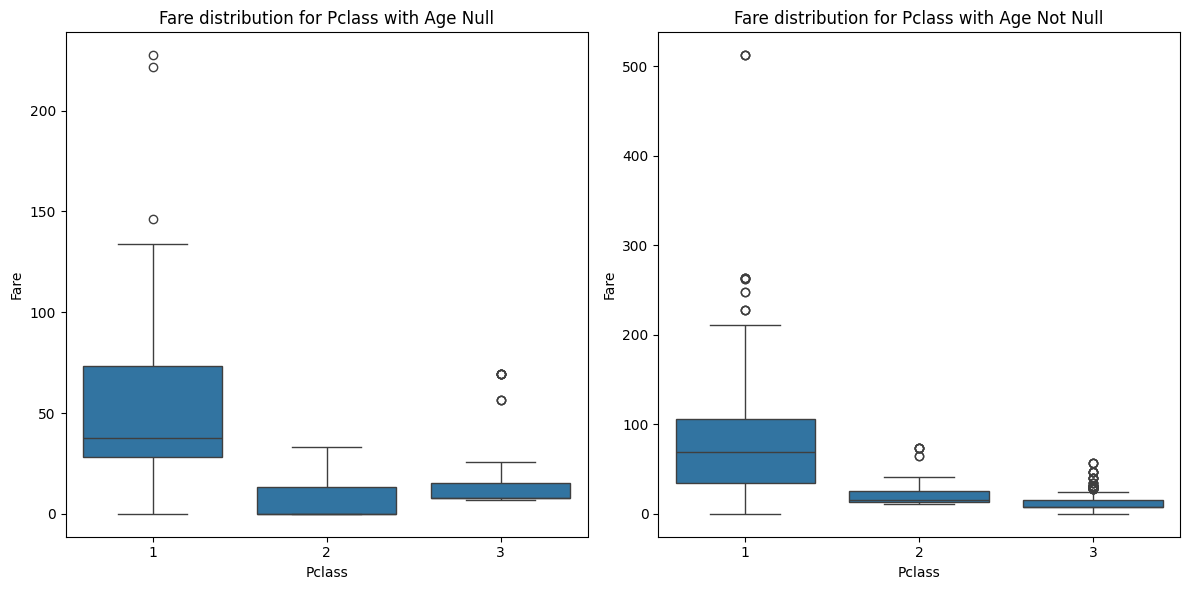

In [13]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
sns.boxplot(x='Pclass',y='Fare',data=train_df_null_age,ax=axes[0])
axes[0].set_title('Fare distribution for Pclass with Age Null')

sns.boxplot(x='Pclass',y='Fare',data=train_df_not_null_age,ax=axes[1])
axes[1].set_title('Fare distribution for Pclass with Age Not Null')

plt.tight_layout()
plt.show()

In [14]:
#Filling the missing values for age
train_df_null_age['Age']=train_df_null_age.groupby(['Pclass','Embarked','Cabin'])['Age'].transform(lambda x: x.fillna(x.median()))

In [15]:
null_zero_check(train_df_null_age)

,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,177,100.000000,NaN,NaN,float64
Cabin,158,89.265537,NaN,NaN,object
Embarked,0,0.000000,0.0,0.0,object
Fare,0,0.000000,0.0,0.0,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


In [16]:
train_df_null_age[train_df_null_age['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [17]:
#Preparing for model 2
train_df_model_2=train_df.copy()
train_df_model_2['Age']=train_df_model_2.groupby(['Pclass','Embarked'])['Age'].transform(lambda x: x.fillna(x.median()))
train_df_model_2['Age'] = train_df_model_2['Age'].fillna(train_df_model_2['Age'].median()) 


test_df_model_2=test_df.copy()
test_df_model_2['Age']=test_df_model_2.groupby(['Pclass','Embarked'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df_model_2['Age'] = test_df_model_2['Age'].fillna(test_df_model_2['Age'].median())
test_df_model_2['Fare'] = test_df_model_2['Fare'].fillna(test_df_model_2['Fare'].median())


In [18]:
#Null check for age in Combined_df
null_zero_check(test_df_model_2)

,Null count,Null_count_percent,Zero count,Zero_count_percent,Datatype
Age,0,0.000000,0.0,0.0,float64
Cabin,327,78.229665,NaN,NaN,object
Embarked,0,0.000000,0.0,0.0,object
Fare,0,0.000000,0.0,0.0,float64
Name,0,0.000000,0.0,0.0,object
Parch,0,0.000000,0.0,0.0,int64
PassengerId,0,0.000000,0.0,0.0,int64
Pclass,0,0.000000,0.0,0.0,int64
Sex,0,0.000000,0.0,0.0,object
SibSp,0,0.000000,0.0,0.0,int64


In [19]:
train_df_model_2=train_df_model_2[num_cols]
test_df_model_2=test_df_model_2[num_cols]
print(train_df_model_2.shape,test_df_model_2.shape)

(891, 4) (418, 4)


In [20]:
#Model 2
pred=model_training(train_df_model_2, test_df_model_2, train_survived)
pred_df=pd.DataFrame(pred)
pred_df.to_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/Predictions/model2.csv')
print(train_df_model_2.shape,test_df_model_2.shape,pred_df.shape)


(891, 4) (418, 4) (418, 1)


In [21]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [22]:
#Checking for skewness and kurtosis
train_df_model_2=train_df_model_2.copy()
test_df_model_2=test_df_model_2.copy()


In [23]:
skewness_values=train_df_model_2.apply(skew)
kurtosis_values=train_df_model_2.apply(kurtosis)
print(skewness_values)
print('\n')
print(kurtosis_values)

Age      0.561132
Fare     4.779253
Parch    2.744487
SibSp    3.689128
dtype: float64


Age       0.711620
Fare     33.204289
Parch     9.716613
SibSp    17.773512
dtype: float64


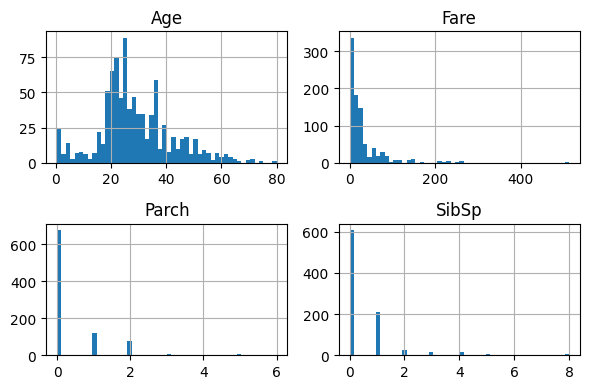

In [24]:
summary_df=pd.DataFrame({
    'Skewness':skewness_values,
    'kurtosis_values':kurtosis_values
},index=train_df_model_2.columns)

#display(summary_df)

train_df_model_2.hist(figsize=(6, 4), bins=50) 
plt.tight_layout()  # Prevent overlapping plots
plt.show() 

In [25]:
# 1)Divide training data into training and testing
# 2)Build logistic regression model
# 3)Predict on test data
# 4)evaluate the model

X_Train=train_df_model_2.copy()
Y_Train=train_survived.copy()

In [26]:
X_Train.head(5)

,Age,Fare,Parch,SibSp
0,22.0,7.2500,0,1
1,38.0,71.2833,0,1
2,26.0,7.9250,0,0
3,35.0,53.1000,0,1
4,35.0,8.0500,0,0


In [27]:


def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    """Trains and evaluates a logistic regression model."""
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
    }

def preprocess_and_evaluate(X_train, X_test, y_train, y_test, method='log'):
    X_train = X_train.copy()
    X_test = X_test.copy()

    print(f"Skewness before {method} transformation:")
    print(X_train.skew())

    for col in X_train.columns:
        if method == 'log' : #and X_train[col].skew() > 0.75:
            X_train[col] = X_train[col].replace(0, 2.3)
            X_test[col] = X_test[col].replace(0, 2.3)
            X_train[col] = np.log1p(X_train[col])
            X_test[col] = np.log1p(X_test[col])
        elif method == 'sqrt':# and X_train[col].skew() > 0.75:
            X_train[col] = X_train[col].replace(0, 2.3)
            X_test[col] = X_test[col].replace(0, 2.3)

            X_train[col] = np.sqrt(np.abs(X_train[col]))
            X_test[col] = np.sqrt(np.abs(X_test[col])) 
        elif method == 'winsorize':# and X_train[col].skew() > 0.75:
            X_train[col] = X_train[col].replace(0, 2.3)
            X_test[col] = X_test[col].replace(0, 2.3)
            X_train[col] = winsorize(X_train[col], limits=[0.05, 0.05])
            X_test[col] = winsorize(X_test[col], limits=[0.05, 0.05])
        # If method is 'None', no transformation is applied

    print(f"Skewness after {method} transformation:")
    print(X_train.skew())

    # Feature scaling
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return evaluate_logistic_regression(X_train, X_test, y_train, y_test)

# Assuming train_df_model_2 and test_df_model_2 are your train and test datasets
results = {}
for method in ['log', 'sqrt', 'winsorize', 'No_Transform']:
    X_train = train_df_model_2.copy()
    y_train = train_survived.copy()

    X_train, X_test, y_train, y_test = train_test_split(
        X_train,y_train , test_size=0.2, random_state=42
    )
    
    results[method] = preprocess_and_evaluate(X_train, X_test, y_train, y_test, method)

results_df = pd.DataFrame.from_dict(results, orient='index')
display(results_df)

#Result with log seems the best


Skewness before log transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dtype: float64
Skewness after log transformation:
Age     -2.078895
Fare     0.876713
Parch   -1.341323
SibSp    0.191076
dtype: float64
Skewness before sqrt transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dtype: float64
Skewness after sqrt transformation:
Age     -0.701576
Fare     2.266972
Parch   -1.055193
SibSp    0.793889
dtype: float64
Skewness before winsorize transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dtype: float64
Skewness after winsorize transformation:
Age      0.268290
Fare     1.844639
Parch   -2.027089
SibSp   -0.912287
dtype: float64
Skewness before No_Transform transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dtype: float64
Skewness after No_Transform transformation:
Age      0.504779
Fare     4.875066
Parch    2.695459
SibSp    3.619385
dty

,Accuracy,Precision,Recall,F1-Score
log,0.731844,0.770833,0.500000,0.606557
sqrt,0.726257,0.790698,0.459459,0.581197
winsorize,0.703911,0.756098,0.418919,0.539130
No_Transform,0.681564,0.814815,0.297297,0.435644


In [28]:

# Accuracy	Precision	Recall	F1-Score
# log	0.720670	0.815789	0.418919	0.553571
# sqrt	0.709497	0.823529	0.378378	0.518519
# winsorize	0.692737	0.827586	0.324324	0.466019
# No_Transform	0.681564	0.814815	0.297297	0.435644

# --0.8

# 	Accuracy	Precision	Recall	F1-Score
# log	0.737430	0.813953	0.472973	0.598291
# sqrt	0.709497	0.843750	0.364865	0.509434
# winsorize	0.698324	0.833333	0.337838	0.480769
# No_Transform	0.681564	0.814815	0.297297	0.435644


# ---0.7
# Accuracy	Precision	Recall	F1-Score
# log	0.731844	0.809524	0.459459	0.586207
# sqrt	0.709497	0.843750	0.364865	0.509434
# winsorize	0.698324	0.833333	0.337838	0.480769
# No_Transform	0.681564	0.814815	0.297297	0.435644

# --0.9
# 	Accuracy	Precision	Recall	F1-Score
# log	0.737430	0.800000	0.486486	0.605042
# sqrt	0.709497	0.843750	0.364865	0.509434
# winsorize	0.698324	0.833333	0.337838	0.480769
# No_Transform	0.681564	0.814815	0.297297	0.435644

# --1.3

# Accuracy	Precision	Recall	F1-Score
# log	0.743017	0.804348	0.500000	0.616667
# sqrt	0.709497	0.789474	0.405405	0.535714
# winsorize	0.698324	0.777778	0.378378	0.509091
# No_Transform	0.681564	0.814815	0.297297	0.435644

#Looks  like 1.3 is best

#--# --1.6
# Accuracy	Precision	Recall	F1-Score
# log	0.743017	0.791667	0.513514	0.622951
# sqrt	0.731844	0.795455	0.472973	0.593220
# winsorize	0.715084	0.780488	0.432432	0.556522
# No_Transform	0.681564	0.814815	0.297297	0.435644


#--# --2
# 	Accuracy	Precision	Recall	F1-Score
# log	0.748603	0.808511	0.513514	0.628099
# sqrt	0.726257	0.790698	0.459459	0.581197
# winsorize	0.698324	0.738095	0.418919	0.534483
# No_Transform	0.681564	0.814815	0.297297	0.435644

In [29]:
#Model_3
train_model3_df=train_df_model_2.copy()
test_model3_df=test_df_model_2.copy()
train_survived_model3_df=train_survived.copy()
print(train_model3_df.shape,test_model3_df.shape,train_survived_model3_df.shape)


(891, 4) (418, 4) (891,)


In [30]:
train_df_model_2.head(5)

,Age,Fare,Parch,SibSp
0,22.0,7.2500,0,1
1,38.0,71.2833,0,1
2,26.0,7.9250,0,0
3,35.0,53.1000,0,1
4,35.0,8.0500,0,0



Average results for Original transformation and 0.1:
accuracy     0.691363
precision    0.748588
recall       0.287884
f1           0.415509
auc          0.706473
dtype: float64

Average results for Log transformation and 0.1:
accuracy     0.702574
precision    0.683386
recall       0.423093
f1           0.520620
auc          0.731473
dtype: float64

Average results for Sqrt transformation and 0.1:
accuracy     0.696962
precision    0.712418
recall       0.355913
f1           0.473241
auc          0.714819
dtype: float64

Average results for Winsorize transformation and 0.1:
accuracy     0.690245
precision    0.717684
recall       0.315136
f1           0.437567
auc          0.694318
dtype: float64


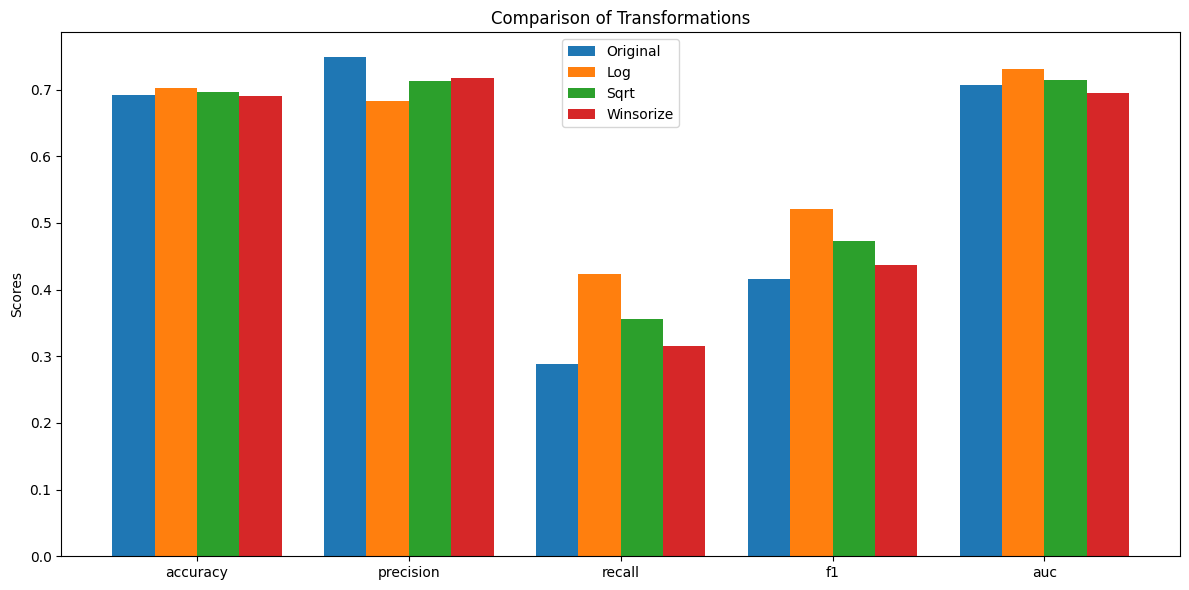


Average results for Original transformation and 0.2:
accuracy     0.691921
precision    0.751630
recall       0.287884
f1           0.415955
auc          0.707612
dtype: float64

Average results for Log transformation and 0.2:
accuracy     0.702012
precision    0.681618
recall       0.423093
f1           0.520118
auc          0.733093
dtype: float64

Average results for Sqrt transformation and 0.2:
accuracy     0.698647
precision    0.716688
recall       0.357428
f1           0.475509
auc          0.717742
dtype: float64

Average results for Winsorize transformation and 0.2:
accuracy     0.690245
precision    0.717561
recall       0.315159
f1           0.437558
auc          0.695846
dtype: float64


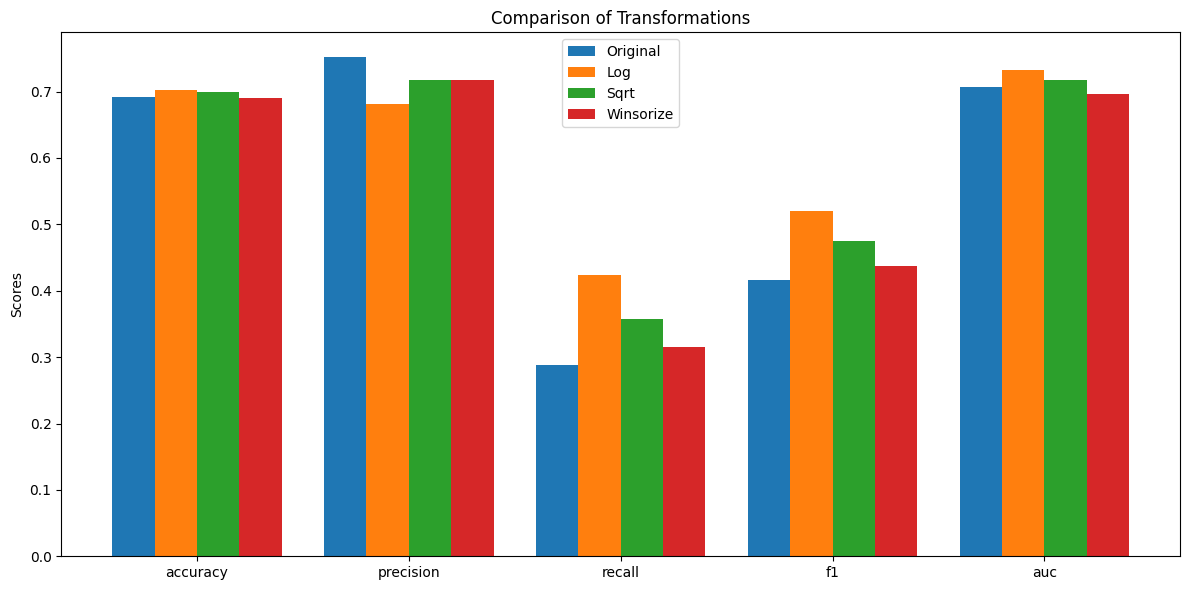


Average results for Original transformation and 0.30000000000000004:
accuracy     0.692857
precision    0.756063
recall       0.287869
f1           0.416604
auc          0.708796
dtype: float64

Average results for Log transformation and 0.30000000000000004:
accuracy     0.702946
precision    0.683207
recall       0.423994
f1           0.521436
auc          0.734945
dtype: float64

Average results for Sqrt transformation and 0.30000000000000004:
accuracy     0.701082
precision    0.721837
recall       0.361931
f1           0.480535
auc          0.719983
dtype: float64

Average results for Winsorize transformation and 0.30000000000000004:
accuracy     0.690618
precision    0.718745
recall       0.315152
f1           0.437664
auc          0.697209
dtype: float64


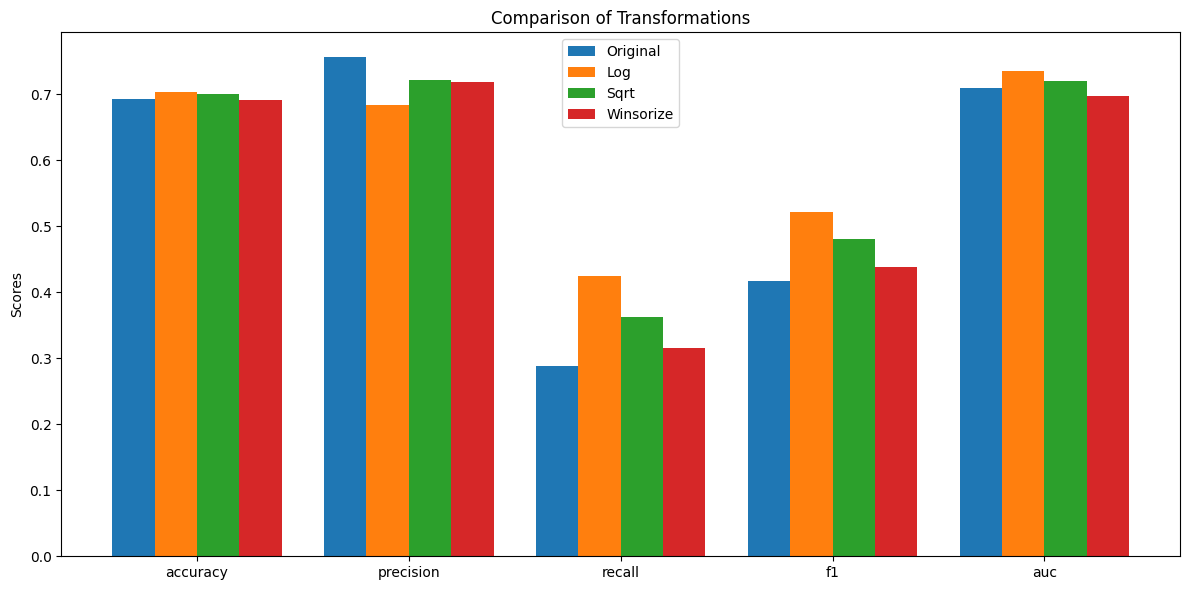


Average results for Original transformation and 0.4:
accuracy     0.693043
precision    0.755984
recall       0.288608
f1           0.417390
auc          0.710029
dtype: float64

Average results for Log transformation and 0.4:
accuracy     0.705097
precision    0.687783
recall       0.425948
f1           0.524342
auc          0.736711
dtype: float64

Average results for Sqrt transformation and 0.4:
accuracy     0.703142
precision    0.725190
recall       0.366385
f1           0.485279
auc          0.721944
dtype: float64

Average results for Winsorize transformation and 0.4:
accuracy     0.691926
precision    0.722334
recall       0.317456
f1           0.440408
auc          0.698445
dtype: float64


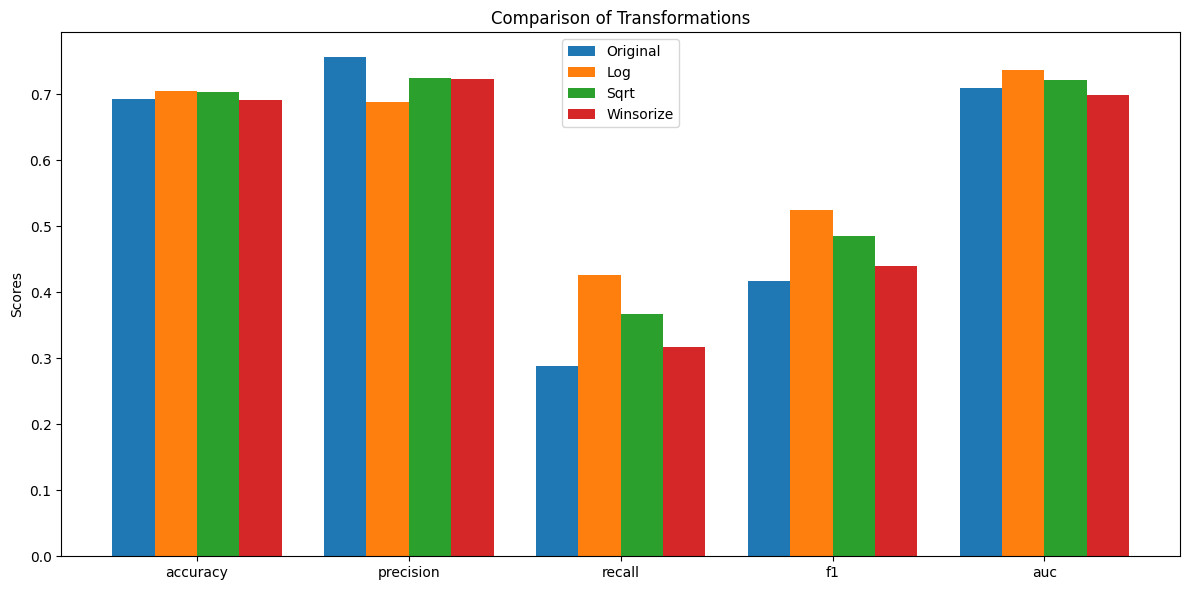


Average results for Original transformation and 0.5:
accuracy     0.693157
precision    0.756940
recall       0.288511
f1           0.417450
auc          0.711122
dtype: float64

Average results for Log transformation and 0.5:
accuracy     0.707062
precision    0.691847
recall       0.428333
f1           0.527390
auc          0.738177
dtype: float64

Average results for Sqrt transformation and 0.5:
accuracy     0.705275
precision    0.728755
recall       0.370785
f1           0.490040
auc          0.723854
dtype: float64

Average results for Winsorize transformation and 0.5:
accuracy     0.692710
precision    0.723842
recall       0.319379
f1           0.442443
auc          0.699787
dtype: float64


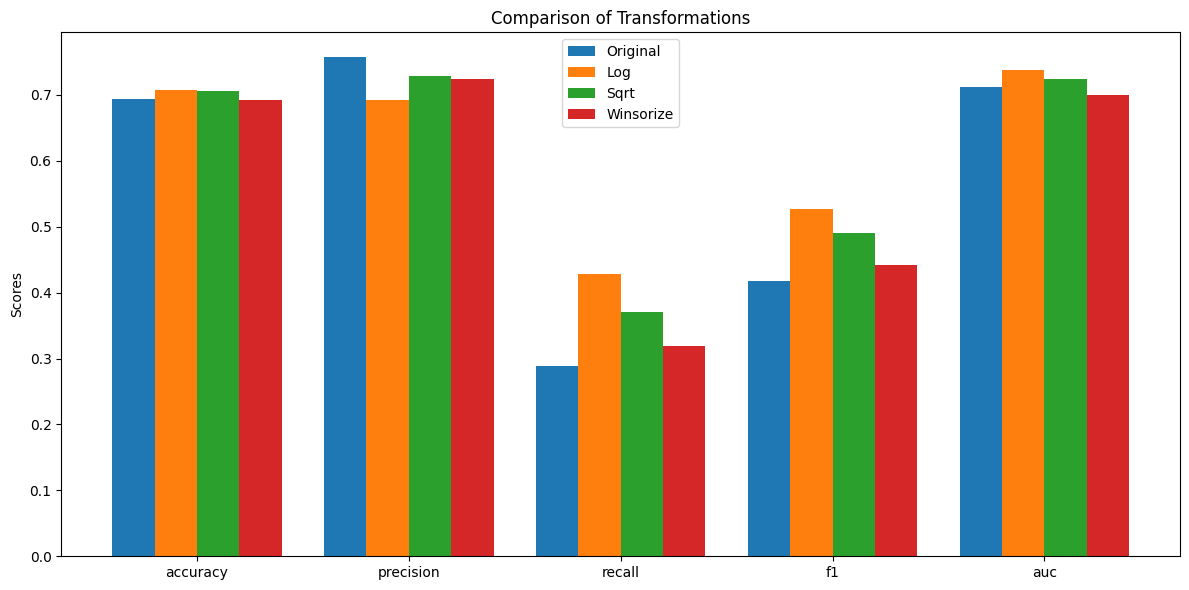


Average results for Original transformation and 0.6:
accuracy     0.693607
precision    0.758578
recall       0.289464
f1           0.418717
auc          0.712148
dtype: float64

Average results for Log transformation and 0.6:
accuracy     0.708934
precision    0.695925
recall       0.429923
f1           0.529893
auc          0.739542
dtype: float64

Average results for Sqrt transformation and 0.6:
accuracy     0.707259
precision    0.731389
recall       0.375702
f1           0.494976
auc          0.725453
dtype: float64

Average results for Winsorize transformation and 0.6:
accuracy     0.693607
precision    0.726083
recall       0.321166
f1           0.444517
auc          0.701066
dtype: float64


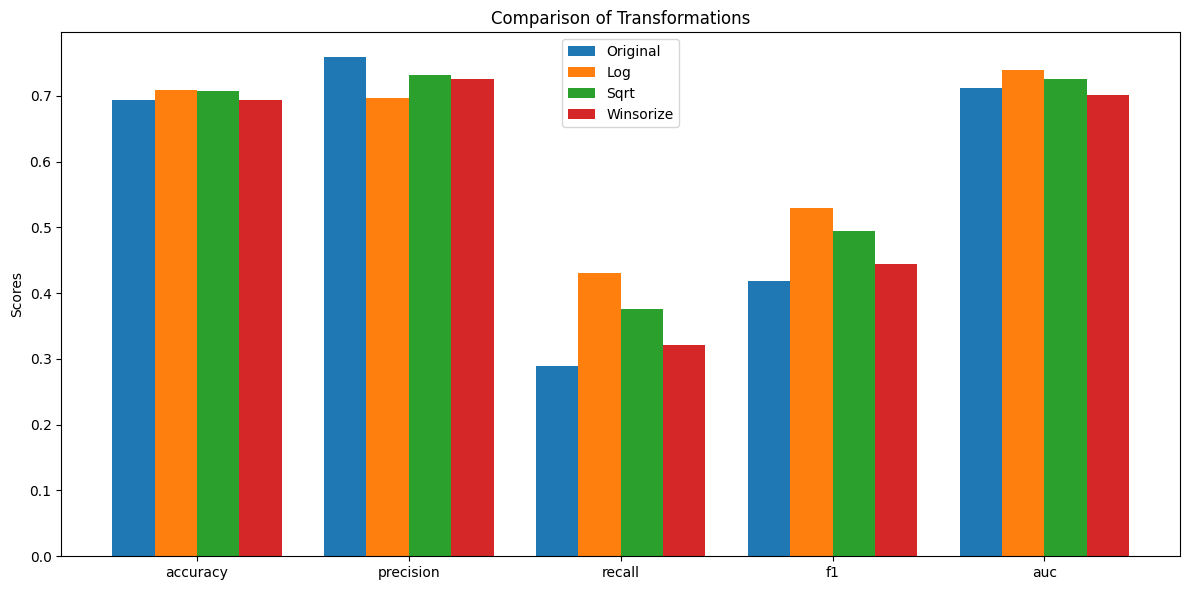


Average results for Original transformation and 0.7000000000000001:
accuracy     0.694089
precision    0.760099
recall       0.290577
f1           0.420126
auc          0.713380
dtype: float64

Average results for Log transformation and 0.7000000000000001:
accuracy     0.711232
precision    0.700358
recall       0.433127
f1           0.533802
auc          0.740512
dtype: float64

Average results for Sqrt transformation and 0.7000000000000001:
accuracy     0.708837
precision    0.733936
recall       0.379219
f1           0.498550
auc          0.727004
dtype: float64

Average results for Winsorize transformation and 0.7000000000000001:
accuracy     0.694890
precision    0.729516
recall       0.323284
f1           0.447212
auc          0.702624
dtype: float64


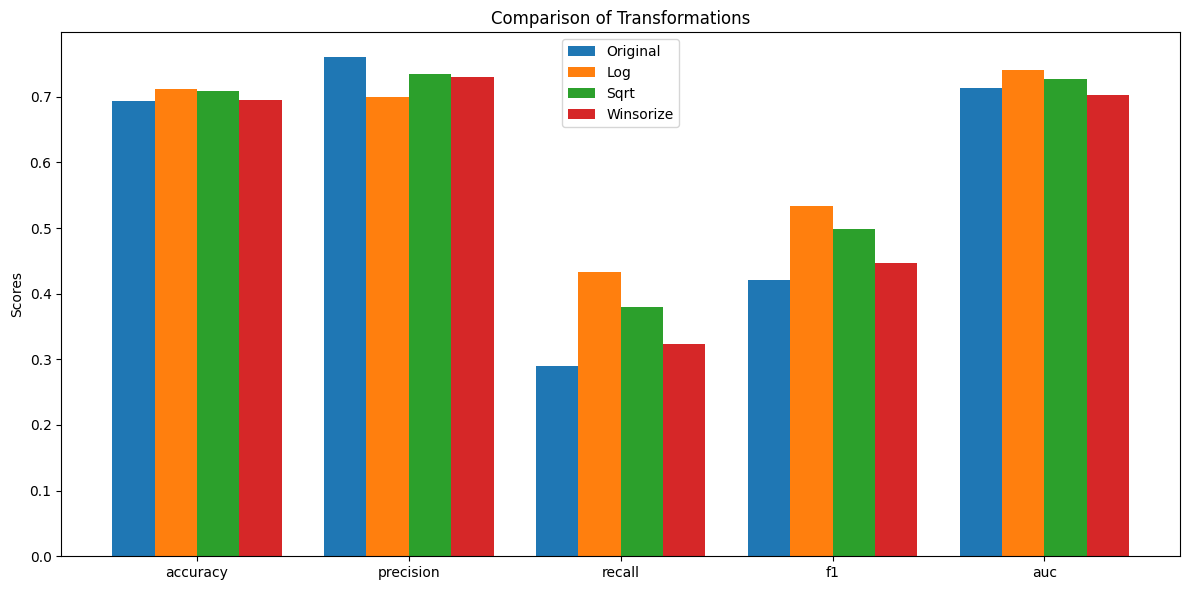


Average results for Original transformation and 0.8:
accuracy     0.694872
precision    0.762311
recall       0.292566
f1           0.422528
auc          0.714552
dtype: float64

Average results for Log transformation and 0.8:
accuracy     0.713236
precision    0.704188
recall       0.435880
f1           0.537173
auc          0.741231
dtype: float64

Average results for Sqrt transformation and 0.8:
accuracy     0.710582
precision    0.737603
recall       0.382246
f1           0.502030
auc          0.728482
dtype: float64

Average results for Winsorize transformation and 0.8:
accuracy     0.696273
precision    0.733642
recall       0.325229
f1           0.449860
auc          0.703937
dtype: float64


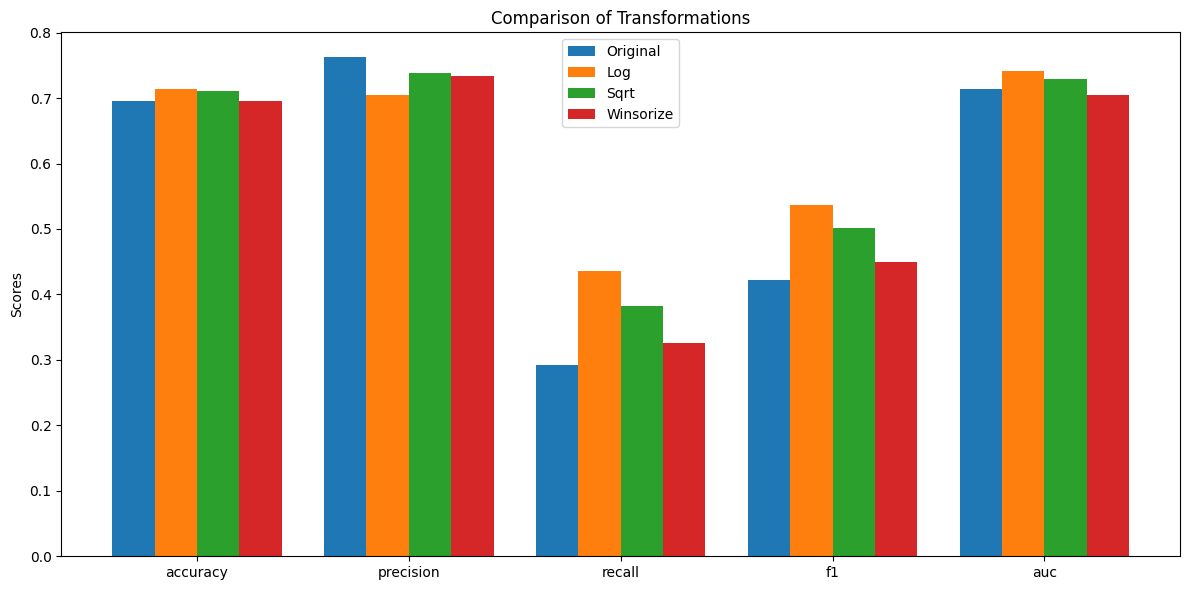


Average results for Original transformation and 0.9:
accuracy     0.695356
precision    0.763165
recall       0.294464
f1           0.424587
auc          0.715503
dtype: float64

Average results for Log transformation and 0.9:
accuracy     0.714419
precision    0.705590
recall       0.438660
f1           0.539812
auc          0.741764
dtype: float64

Average results for Sqrt transformation and 0.9:
accuracy     0.711941
precision    0.739913
recall       0.384938
f1           0.504960
auc          0.729597
dtype: float64

Average results for Winsorize transformation and 0.9:
accuracy     0.697599
precision    0.735912
recall       0.328370
f1           0.453298
auc          0.704985
dtype: float64


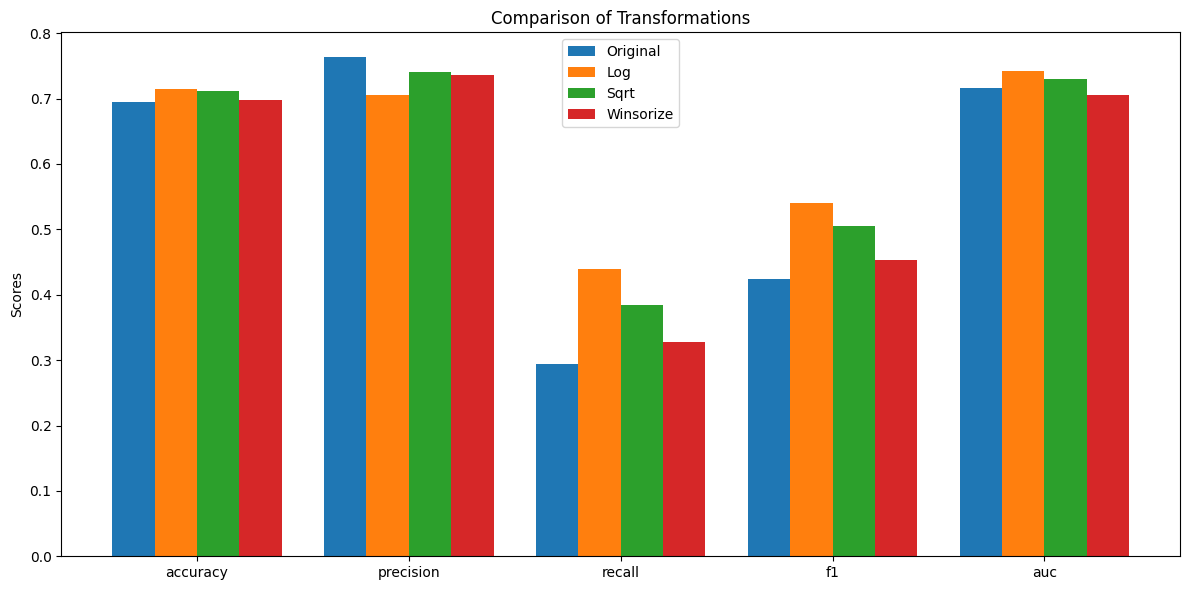


Average results for Original transformation and 1.0:
accuracy     0.695968
precision    0.764181
recall       0.296604
f1           0.426887
auc          0.716276
dtype: float64

Average results for Log transformation and 1.0:
accuracy     0.715254
precision    0.706610
recall       0.440619
f1           0.541683
auc          0.742209
dtype: float64

Average results for Sqrt transformation and 1.0:
accuracy     0.713252
precision    0.741658
recall       0.387930
f1           0.508033
auc          0.730676
dtype: float64

Average results for Winsorize transformation and 1.0:
accuracy     0.698548
precision    0.737520
recall       0.330587
f1           0.455757
auc          0.705534
dtype: float64


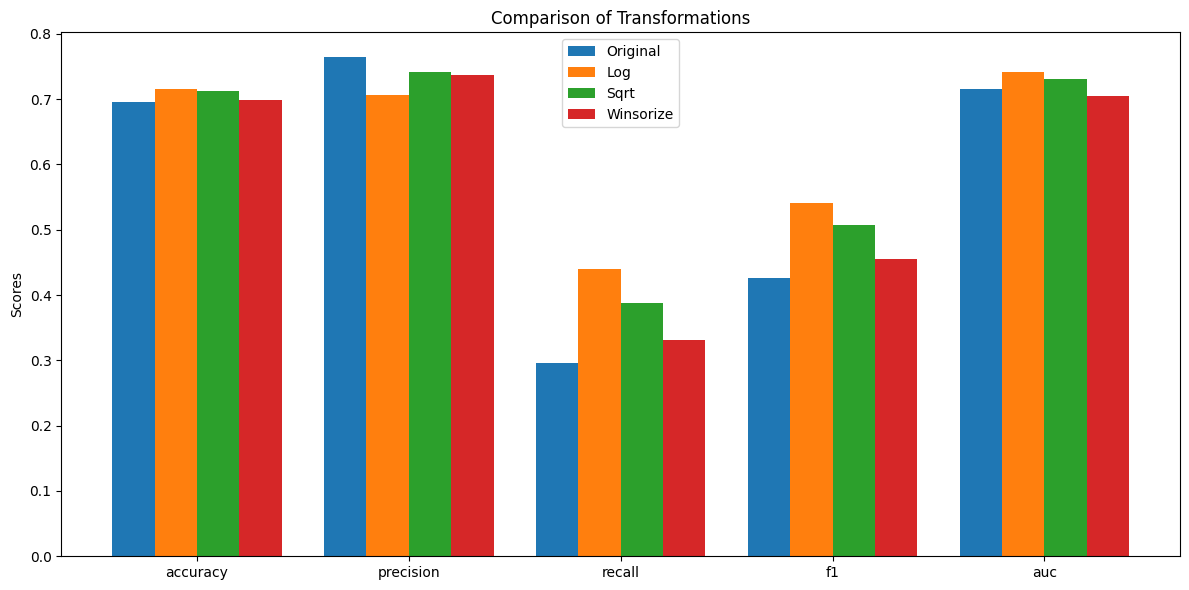


Average results for Original transformation and 1.1:
accuracy     0.697083
precision    0.766538
recall       0.299464
f1           0.430103
auc          0.716953
dtype: float64

Average results for Log transformation and 1.1:
accuracy     0.716038
precision    0.707339
recall       0.442717
f1           0.543568
auc          0.742501
dtype: float64

Average results for Sqrt transformation and 1.1:
accuracy     0.714426
precision    0.742069
recall       0.391980
f1           0.511575
auc          0.731421
dtype: float64

Average results for Winsorize transformation and 1.1:
accuracy     0.699733
precision    0.739109
recall       0.333749
f1           0.459036
auc          0.705837
dtype: float64


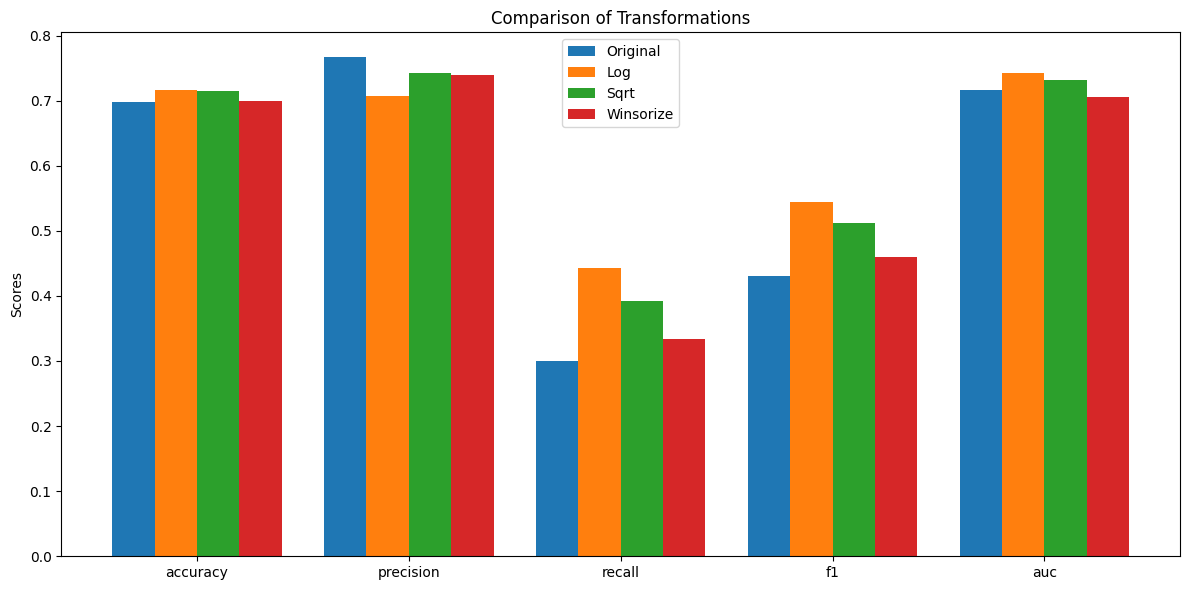


Average results for Original transformation and 1.2000000000000002:
accuracy     0.698292
precision    0.768764
recall       0.302559
f1           0.433549
auc          0.717539
dtype: float64

Average results for Log transformation and 1.2000000000000002:
accuracy     0.717346
precision    0.708640
recall       0.446144
f1           0.546548
auc          0.742738
dtype: float64

Average results for Sqrt transformation and 1.2000000000000002:
accuracy     0.715498
precision    0.742338
recall       0.395873
f1           0.514888
auc          0.731831
dtype: float64

Average results for Winsorize transformation and 1.2000000000000002:
accuracy     0.700720
precision    0.739894
recall       0.336896
f1           0.462103
auc          0.705983
dtype: float64


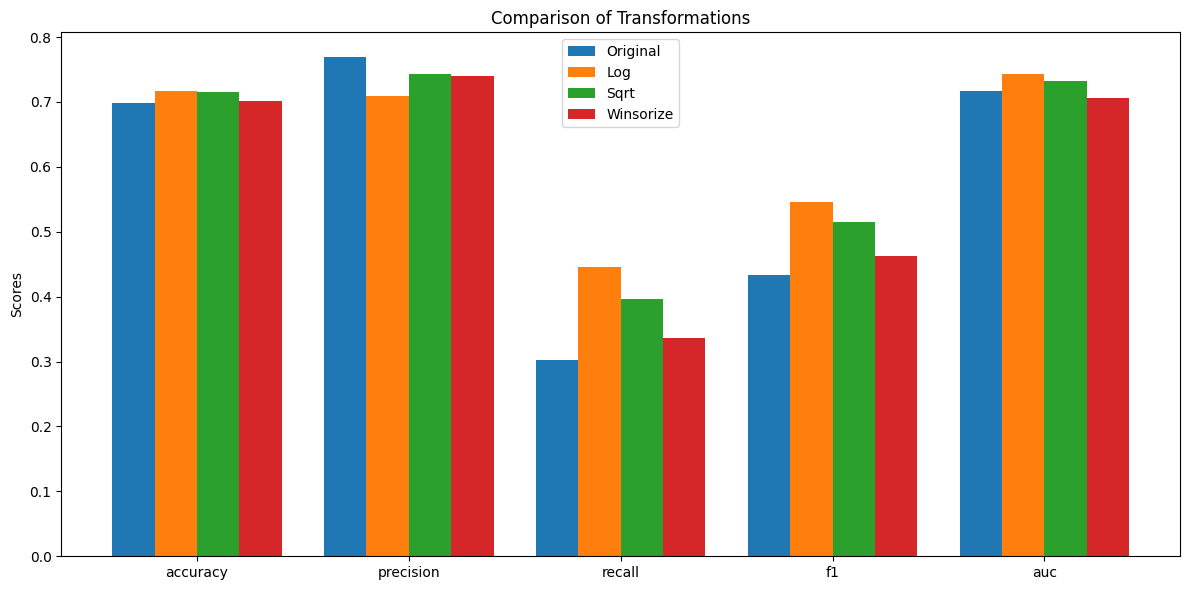


Average results for Original transformation and 1.3000000000000003:
accuracy     0.698970
precision    0.768699
recall       0.305415
f1           0.436329
auc          0.717829
dtype: float64

Average results for Log transformation and 1.3000000000000003:
accuracy     0.718021
precision    0.708475
recall       0.449053
f1           0.548659
auc          0.742901
dtype: float64

Average results for Sqrt transformation and 1.3000000000000003:
accuracy     0.716750
precision    0.742422
recall       0.400432
f1           0.518693
auc          0.732086
dtype: float64

Average results for Winsorize transformation and 1.3000000000000003:
accuracy     0.701469
precision    0.739521
recall       0.340212
f1           0.465056
auc          0.705943
dtype: float64


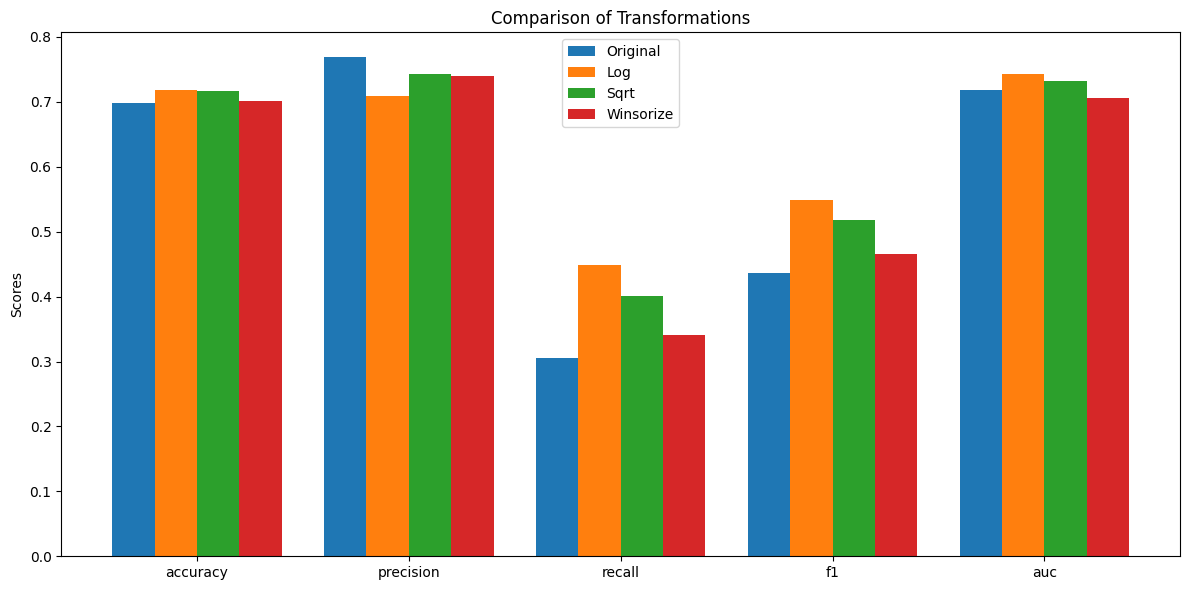


Average results for Original transformation and 1.4000000000000001:
accuracy     0.699711
precision    0.769018
recall       0.308272
f1           0.439167
auc          0.718011
dtype: float64

Average results for Log transformation and 1.4000000000000001:
accuracy     0.718038
precision    0.706566
recall       0.452118
f1           0.550248
auc          0.742901
dtype: float64

Average results for Sqrt transformation and 1.4000000000000001:
accuracy     0.718063
precision    0.742580
recall       0.405166
f1           0.522609
auc          0.732231
dtype: float64

Average results for Winsorize transformation and 1.4000000000000001:
accuracy     0.701950
precision    0.738314
recall       0.343484
f1           0.467755
auc          0.705965
dtype: float64


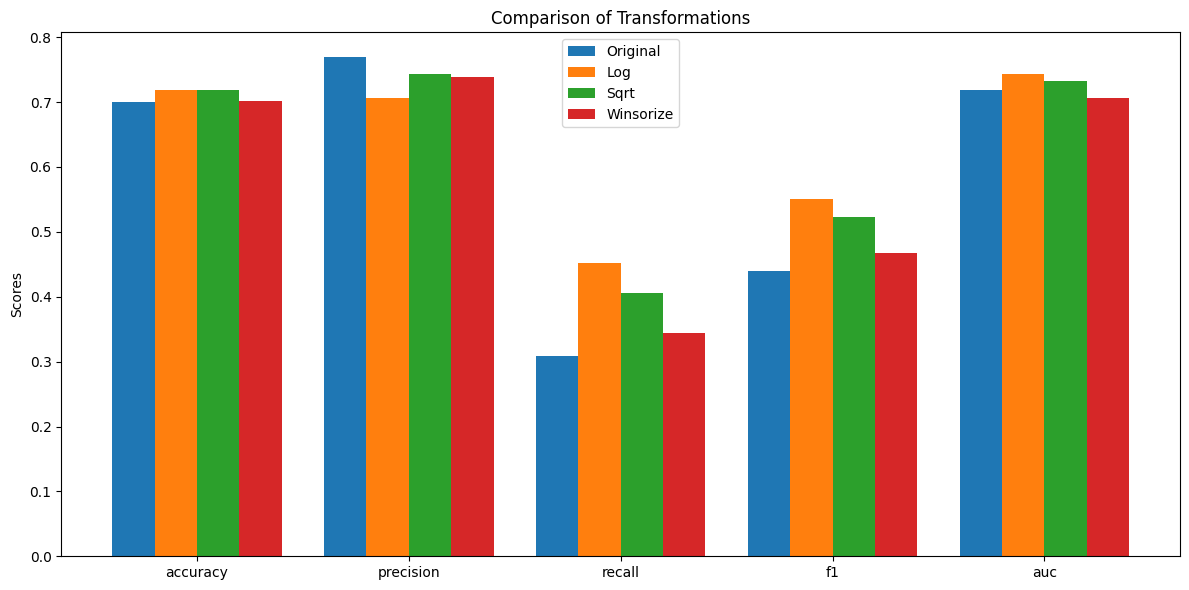


Average results for Original transformation and 1.5000000000000002:
accuracy     0.700129
precision    0.767344
recall       0.311545
f1           0.441983
auc          0.718068
dtype: float64

Average results for Log transformation and 1.5000000000000002:
accuracy     0.718202
precision    0.704846
recall       0.455992
f1           0.552399
auc          0.742861
dtype: float64

Average results for Sqrt transformation and 1.5000000000000002:
accuracy     0.718751
precision    0.741113
recall       0.409630
f1           0.525707
auc          0.732290
dtype: float64

Average results for Winsorize transformation and 1.5000000000000002:
accuracy     0.702291
precision    0.736505
recall       0.346858
f1           0.470352
auc          0.706016
dtype: float64


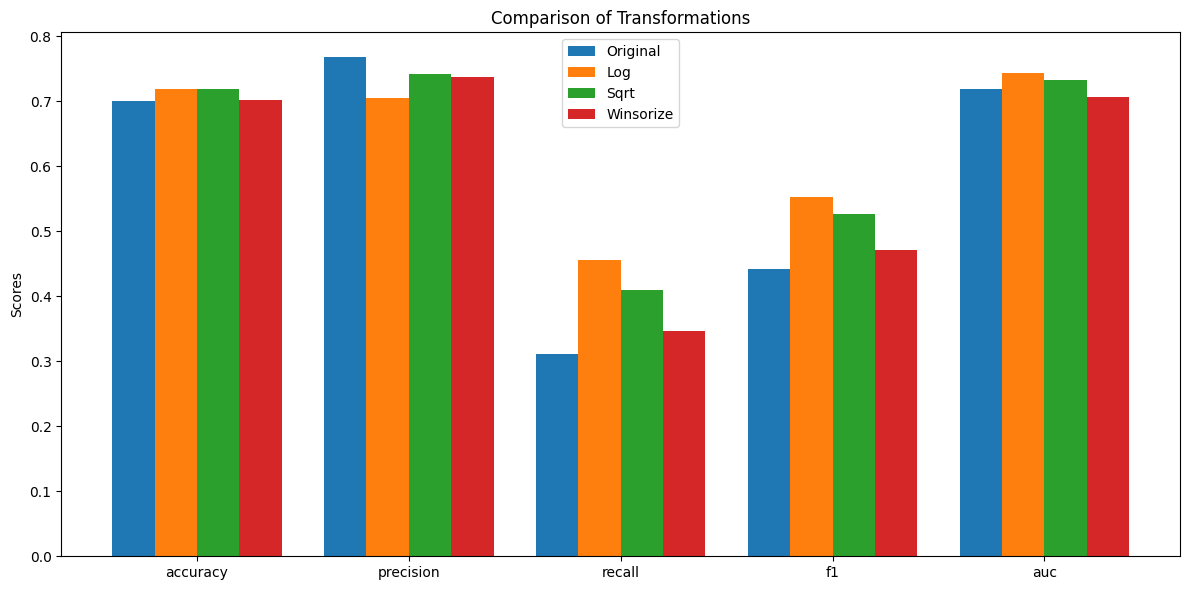


Average results for Original transformation and 1.6:
accuracy     0.700634
precision    0.765111
recall       0.315626
f1           0.445414
auc          0.718072
dtype: float64

Average results for Log transformation and 1.6:
accuracy     0.717995
precision    0.702752
recall       0.459021
f1           0.553820
auc          0.742619
dtype: float64

Average results for Sqrt transformation and 1.6:
accuracy     0.719213
precision    0.739547
recall       0.413547
f1           0.528356
auc          0.732171
dtype: float64

Average results for Winsorize transformation and 1.6:
accuracy     0.702800
precision    0.734975
recall       0.350721
f1           0.473387
auc          0.706141
dtype: float64


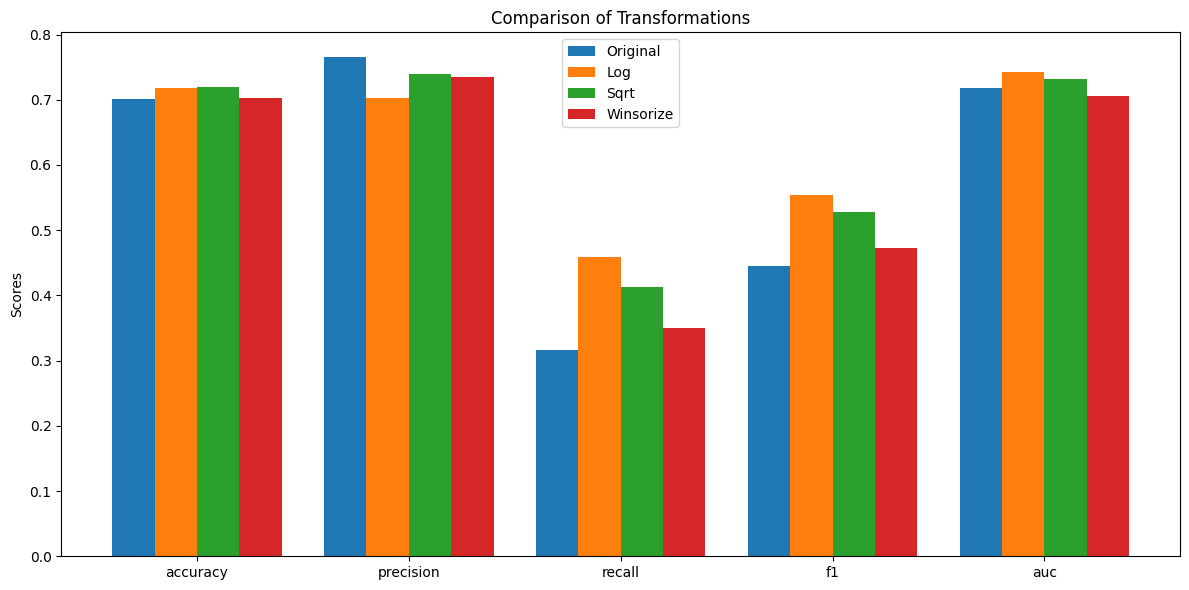


Average results for Original transformation and 1.7000000000000002:
accuracy     0.701211
precision    0.762982
recall       0.319917
f1           0.448984
auc          0.717976
dtype: float64

Average results for Log transformation and 1.7000000000000002:
accuracy     0.717613
precision    0.700474
recall       0.461673
f1           0.554886
auc          0.742218
dtype: float64

Average results for Sqrt transformation and 1.7000000000000002:
accuracy     0.719357
precision    0.737463
recall       0.417013
f1           0.530480
auc          0.731923
dtype: float64

Average results for Winsorize transformation and 1.7000000000000002:
accuracy     0.703117
precision    0.733480
recall       0.353789
f1           0.475725
auc          0.706246
dtype: float64


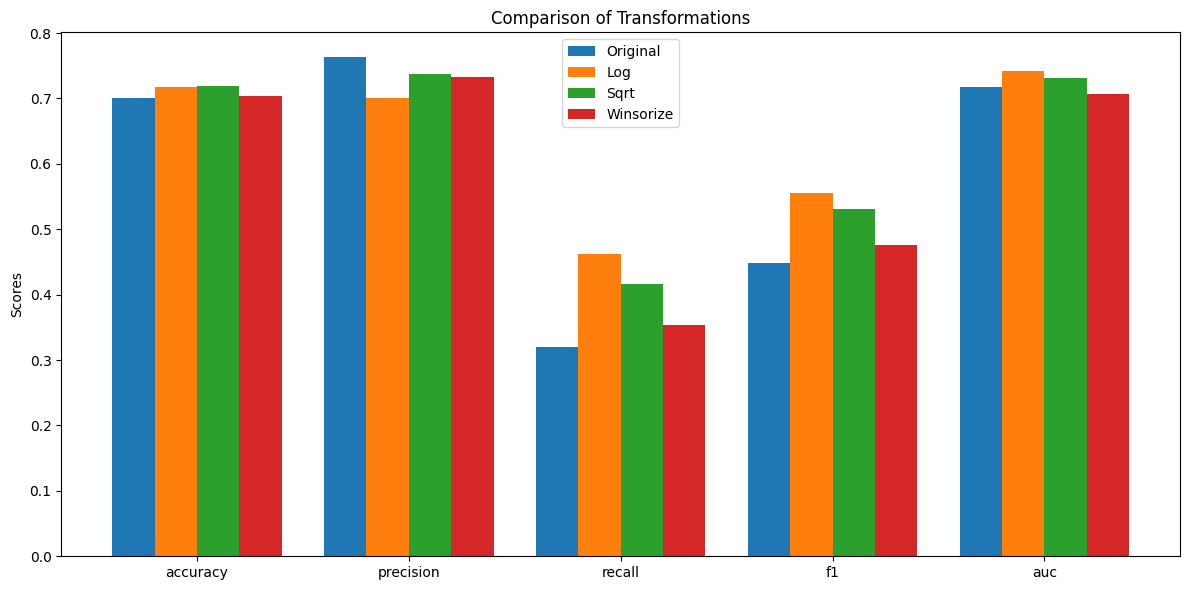


Average results for Original transformation and 1.8000000000000003:
accuracy     0.701539
precision    0.760197
recall       0.324253
f1           0.452345
auc          0.717851
dtype: float64

Average results for Log transformation and 1.8000000000000003:
accuracy     0.717087
precision    0.698168
recall       0.463690
f1           0.555495
auc          0.741762
dtype: float64

Average results for Sqrt transformation and 1.8000000000000003:
accuracy     0.719172
precision    0.734929
recall       0.419933
f1           0.532016
auc          0.731579
dtype: float64

Average results for Winsorize transformation and 1.8000000000000003:
accuracy     0.703337
precision    0.731751
recall       0.356834
f1           0.477931
auc          0.706259
dtype: float64


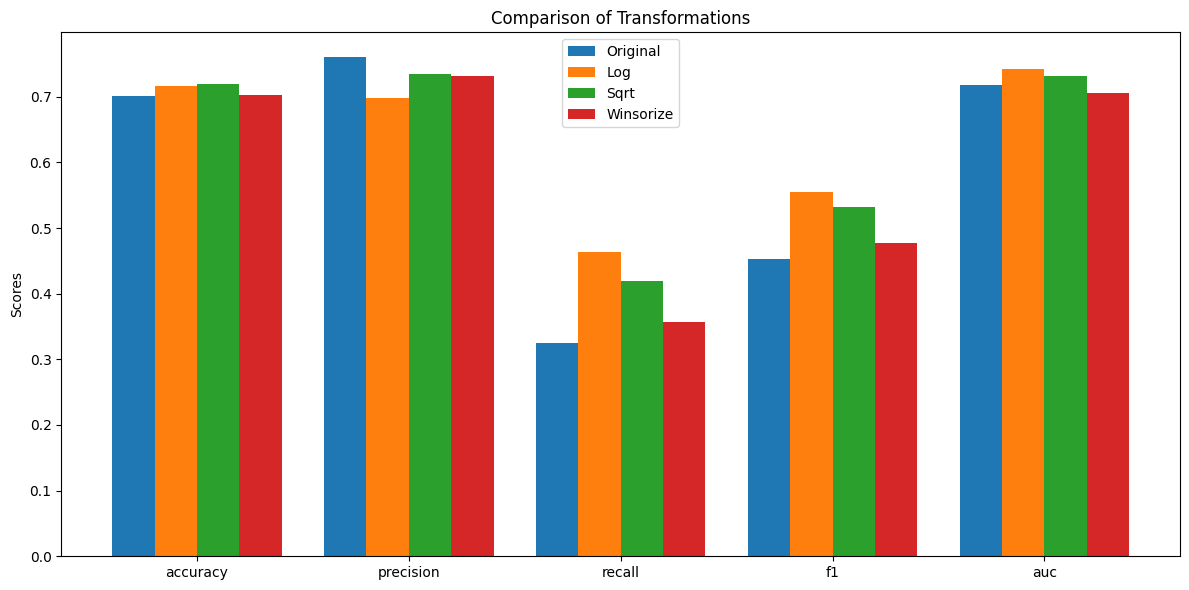


Average results for Original transformation and 1.9000000000000001:
accuracy     0.701712
precision    0.757015
recall       0.328571
f1           0.455554
auc          0.717730
dtype: float64

Average results for Log transformation and 1.9000000000000001:
accuracy     0.716676
precision    0.696353
recall       0.465351
f1           0.556025
auc          0.741253
dtype: float64

Average results for Sqrt transformation and 1.9000000000000001:
accuracy     0.718771
precision    0.732338
recall       0.422261
f1           0.533047
auc          0.731207
dtype: float64

Average results for Winsorize transformation and 1.9000000000000001:
accuracy     0.703534
precision    0.730509
recall       0.359265
f1           0.479725
auc          0.706167
dtype: float64


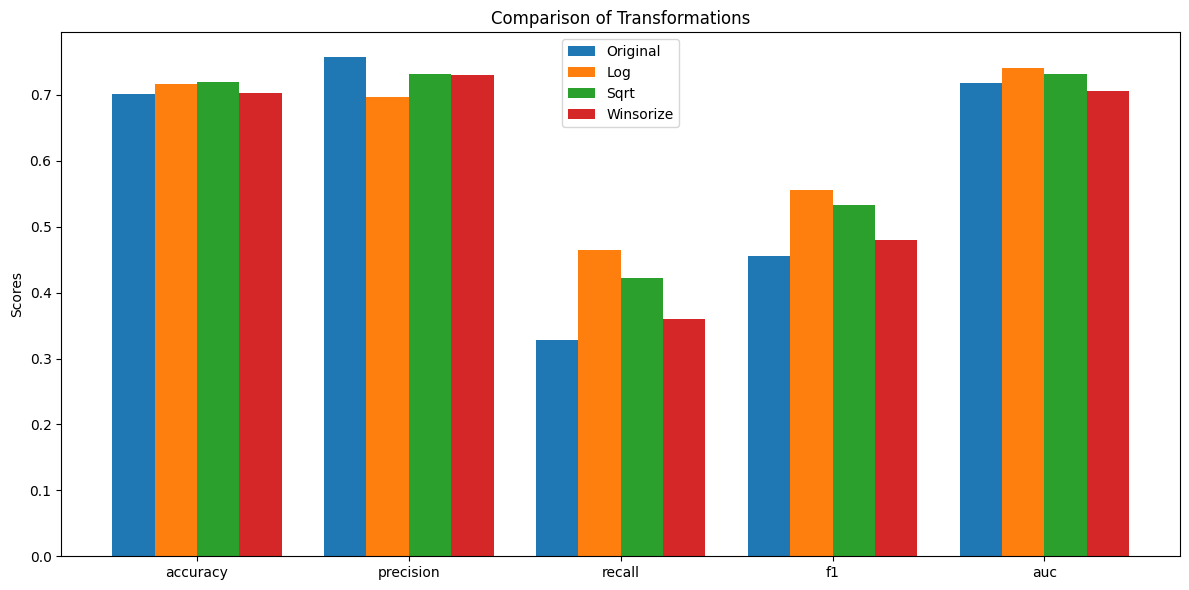

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Define transformations
def log_transform(X):
    return np.log1p(X)

def sqrt_transform(X):
    return np.sqrt(X)

def winsorize_transform(X, limits=(0.05, 0.95)):
    # print(f"Type of X: {type(X)}")
    # print(f"Shape of X: {X.shape}")
    
    lower = np.percentile(X, limits[0] * 100, axis=0)
    upper = np.percentile(X, limits[1] * 100, axis=0)
    return np.clip(X, lower, upper)

transformations = {
    'Original': lambda x: x,
    'Log': log_transform,
    'Sqrt': sqrt_transform,
    'Winsorize': winsorize_transform
}

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize results dictionary
results = {name: [] for name in transformations.keys()}

# Clean the data
for i in np.arange(0.1, 2, 0.1):
    X=train_df_model_2.copy()
    y=train_survived.copy()
    X = X.fillna(X.mean())  # Replace NaNs with mean
    X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean())  # Replace infinities with mean
    X=X.replace(0,i)


# Perform cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # print(f"X_train shape: {X_train.shape}")
        # print(f"X_test shape: {X_test.shape}")
        
        # Apply transformations and fit logistic regression
        for name, transform in transformations.items():
            # print(f"\nApplying {name} transformation")
            try:
                X_train_transformed = transform(X_train)
                X_test_transformed = transform(X_test)
                
                # print(f"X_train_transformed shape: {X_train_transformed.shape}")
                # print(f"X_test_transformed shape: {X_test_transformed.shape}")
                
                # Scale the data
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train_transformed)
                X_test_scaled = scaler.transform(X_test_transformed)
                
                # Fit logistic regression
                model = LogisticRegression(random_state=42)
                model.fit(X_train_scaled, y_train)
                
                # Make predictions
                y_pred = model.predict(X_test_scaled)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                
                # Calculate metrics
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred_proba)
                
                results[name].append({
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1,
                    'auc': auc
                })
                
            except Exception as e:
                print(f"Error in {name} transformation: {str(e)}")
                continue

    # Calculate average results
    avg_results = {name: pd.DataFrame(res).mean() for name, res in results.items()}

    # Print results
    for name, res in avg_results.items():
        print(f"\nAverage results for {name} transformation and {i}:")
        print(res)

    # Visualize results
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    x = np.arange(len(metrics))
    width = 0.2

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, (name, res) in enumerate(avg_results.items()):
        ax.bar(x + i*width, res[metrics], width, label=name)

    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Transformations')
    ax.set_xticks(x + width * 1.5)
    ax.set_xticklabels(metrics)
    ax.legend(loc='best')

    plt.tight_layout()
    plt.show()


In [32]:
# Log transformation with 0 values as  1.5000000000000002 performed the best
train_df_model_2.head(5)

,Age,Fare,Parch,SibSp
0,22.0,7.2500,0,1
1,38.0,71.2833,0,1
2,26.0,7.9250,0,0
3,35.0,53.1000,0,1
4,35.0,8.0500,0,0


In [33]:
test_df_model_2.head(5)

,Age,Fare,Parch,SibSp
0,34.5,7.8292,0,0
1,47.0,7.0000,0,1
2,62.0,9.6875,0,0
3,27.0,8.6625,0,0
4,22.0,12.2875,1,1


In [34]:
train_survived.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
#Creating model after log transform-model 3
train_df_model_3=train_df_model_2.copy()

test_df_model_3=test_df_model_2.copy()

train_df_model_3=train_df_model_3.replace(0,1.5)
test_df_model_3=test_df_model_3.replace(0,1.5)


In [36]:
log_reg = LogisticRegression()
log_reg.fit(train_df_model_3, train_survived)

LogisticRegression()

In [37]:
y_pred = log_reg.predict(test_df_model_3)
pred_df=pd.DataFrame(y_pred)
pred_df.to_csv('/home/anuragverma/Desktop/Kaggle/Titanic/Titanic_classification_pred-1/Predictions/model_best_num.csv')
print(train_df_model_2.shape,test_df_model_2.shape,pred_df.shape)

#best till now:- 0.69138

(891, 4) (418, 4) (418, 1)
